In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import yfinance as yf 


In [3]:
data = yf.download('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [6]:
log_returns = np.log(1+data['Adj Close'].pct_change())

In [7]:
u=log_returns.mean()
var=log_returns.var()
drift = u - (0.5 *var)
drift

0.0002915152261100667

In [9]:
st_dev=log_returns.std()
days=50
trials=100
Z=norm.ppf(np.random.rand(days,trials)) 
daily_returns=np.exp(np.array(drift) + np.array(st_dev)*Z) 




In [10]:
price_paths = np.zeros_like(daily_returns) 
price_paths[0] = data['Adj Close'].iloc[-1]
for t in range (1, days): 
    price_paths[t] =price_paths[t-1] * daily_returns[t]
    


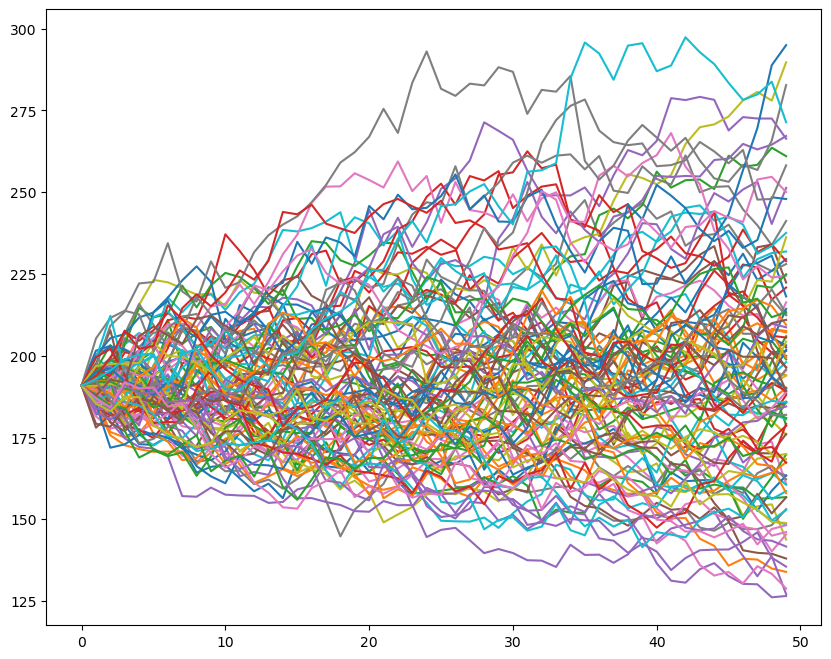

In [11]:
plt.figure(figsize=[10,8]) 
plt.plot(price_paths)